# Tarea 1: Reconocimiento de Patrones en Minería de Datos


## Parte I: Análisis de rendimiento de distintos algoritmos de clustering

Ideas interesantes:
* Graficar siempre los clusters (colores) obtenidos.
* Utilizar un contraste de hipótesis para deteminar la mejor combinación de hiperparámetros.
* 8



In [89]:
import numpy as np
import sklearn.cluster as cl
import sklearn.metrics as mtr
import seaborn as sns; sns.set() 
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

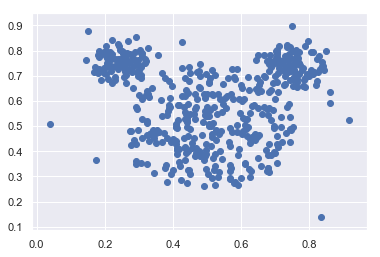

In [90]:
mouse_file = open('mouse.txt', 'r')
mouse = []
for line in mouse_file:
    point = line.strip().split("\t")
    mouse.append([float(point[0]), float(point[1])])

mouse = np.array(mouse)
plt.scatter(mouse[:,0], mouse[:,1])

In [91]:
def errorKMeansMetric(iters):
    errors = []
    for x in range(1,iters):
        mouse_kMeans = cl.KMeans(n_clusters=x+1, random_state=0).fit(mouse)
        y_mouse_kMeans = mouse_kMeans.predict(mouse)
        errors.append(mtr.silhouette_score(mouse, y_mouse_kMeans))
    plt.plot(np.arange(2,iters+1), errors)
    
interact(errorKMeansMetric, iters=widgets.IntSlider(min=2,max=20,step=1,value=5, continuous_update=False))


interactive(children=(IntSlider(value=5, continuous_update=False, description='iters', max=20, min=2), Output(…

<function __main__.errorKMeansMetric(iters)>

0.5084881980573831


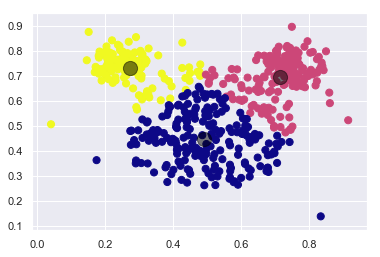

In [59]:
mouse_kMeans = cl.KMeans(n_clusters=3).fit(mouse)
y_mouse_kMeans = mouse_kMeans.predict(mouse)
mouse_kMeans_centers = mouse_kMeans.cluster_centers_

plt.scatter(mouse[:, 0], mouse[:, 1], c=y_mouse_kMeans, s=50, cmap='plasma')
plt.scatter(mouse_kMeans_centers[:, 0], mouse_kMeans_centers[:, 1], c='black', s=200, alpha=0.5);

mouse_kMeans_scorer = mtr.silhouette_score(mouse, y_mouse_kMeans)
print(mouse_kMeans_scorer)


In [92]:
def errorSingleAggloMetric(iters):
    errors = []
    for x in range(1,iters):
        mouse_sAgglo = cl.AgglomerativeClustering(n_clusters = x+1, linkage='single').fit_predict(mouse)
        errors.append(mtr.silhouette_score(mouse, mouse_sAgglo))
    plt.plot(np.arange(2,iters+1), errors)
    
interact(errorSingleAggloMetric, iters=widgets.IntSlider(min=2,max=20,step=1,value=5, continuous_update=False))

interactive(children=(IntSlider(value=5, continuous_update=False, description='iters', max=20, min=2), Output(…

<function __main__.errorSingleAggloMetric(iters)>

0.43332042913140406


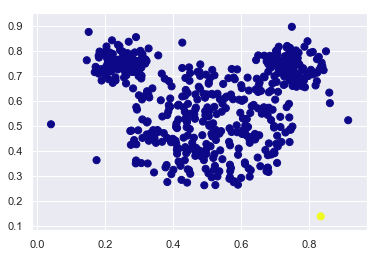

In [93]:
mouse_sAgglo = cl.AgglomerativeClustering(n_clusters = 2, linkage='single').fit_predict(mouse)

plt.scatter(mouse[:, 0], mouse[:, 1], c=mouse_sAgglo, s=50, cmap='plasma')

mouse_sAgglo_scorer = mtr.silhouette_score(mouse, mouse_sAgglo)
print(mouse_sAgglo_scorer)

In [111]:
def errorCompleteAggloMetric(iters):
    errors = []
    for x in range(1,iters):
        mouse_sAgglo = cl.AgglomerativeClustering(n_clusters = x+1, linkage='complete').fit_predict(mouse)
        errors.append(mtr.silhouette_score(mouse, mouse_sAgglo))
    plt.plot(np.arange(2,iters+1), errors)
    
interact(errorCompleteAggloMetric, iters=widgets.IntSlider(min=2,max=20,step=1,value=5, continuous_update=False))

interactive(children=(IntSlider(value=5, continuous_update=False, description='iters', max=20, min=2), Output(…

<function __main__.errorCompleteAggloMetric(iters)>

-0.3921940977968814


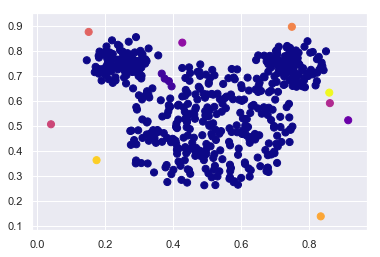

In [112]:
mouse_sAgglo = cl.AgglomerativeClustering(n_clusters = 11, linkage='single').fit_predict(mouse)

plt.scatter(mouse[:, 0], mouse[:, 1], c=mouse_sAgglo, s=50, cmap='plasma')

mouse_sAgglo_scorer = mtr.silhouette_score(mouse, mouse_sAgglo)
print(mouse_sAgglo_scorer)

In [88]:
def errorDBSCANMetric(eps_val, samples):
    errors = []
    for x in np.arange(0.01,eps_val+0.01, 0.01):
        mouse_DBSCAN = cl.DBSCAN(eps=x, min_samples=samples).fit_predict(mouse)
        errors.append(mtr.silhouette_score(mouse, mouse_DBSCAN))
    plt.plot(errors)
    
interact(errorDBSCANMetric, eps_val=widgets.FloatSlider(min=0.01,max=0.2,step=0.02,value=0.19, continuous_update=False), samples = widgets.IntSlider(min=2,max=6,step=1,value=5, continuous_update=False))

interactive(children=(FloatSlider(value=0.19, continuous_update=False, description='eps_val', max=0.2, min=0.0…

<function __main__.errorDBSCANMetric(eps_val, samples)>

0.43332042913140406


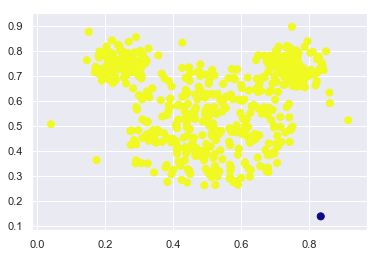

In [97]:
mouse_DBSCAN = cl.DBSCAN(eps=0.2, min_samples=6).fit_predict(mouse)

plt.scatter(mouse[:, 0], mouse[:, 1], c=mouse_DBSCAN, s=50, cmap='plasma')

mouse_DBSCAN_scorer = mtr.silhouette_score(mouse, mouse_DBSCAN)
print(mouse_DBSCAN_scorer)

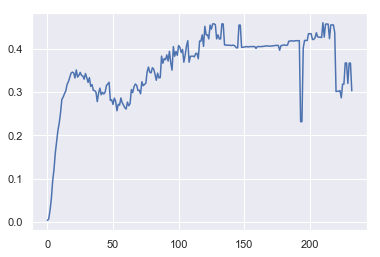

In [107]:
errors = []
for x in np.arange(0.001,0.234,0.001):
    mouse_MeanShift = cl.MeanShift(bandwidth=x).fit(mouse)
    y_mouse_MeanShift = mouse_MeanShift.predict(mouse)
    errors.append(mtr.silhouette_score(mouse, y_mouse_MeanShift))
plt.plot(errors)

In [114]:
print(np.amax(errors))
errors.index(0.4596886911339167)

0.4596886911339167


210

0.4596886911339167


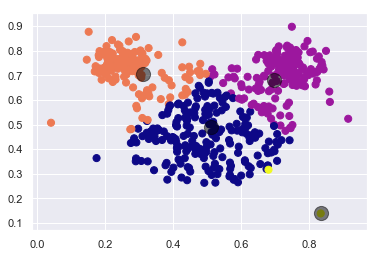

In [115]:
mouse_MeanShift = cl.MeanShift(bandwidth=0.211).fit(mouse)
y_mouse_MeanShift = mouse_MeanShift.predict(mouse)
mouse_MeanShift_centers = mouse_MeanShift.cluster_centers_

plt.scatter(mouse[:, 0], mouse[:, 1], c=y_mouse_MeanShift, s=50, cmap='plasma')
plt.scatter(mouse_MeanShift_centers[:, 0], mouse_MeanShift_centers[:, 1], c='black', s=200, alpha=0.5);

mouse_MeanShift_scorer = mtr.silhouette_score(mouse, y_mouse_MeanShift)
print(mouse_MeanShift_scorer)